# DSCI 235 Final Project

Data source: https://covidtracking.com/race

GitHub:

### Project Description

COVID-19 is spreading at an alarming rate all around the globe. Healthcare systems are experiencing a tremendous amount of pressure and health professionals are working extra long and exhausting shifts to deal with the demand. COVID-19 is killing people on a large scale. However, the impact of the pandemic and its consequences are felt differently according to the status of an individual. Data by different social identities, such as class, age, gender, and race shows that minorities have been disproportionately affected by the pandemic. These minorities in the United States are not having their right to health fulfilled. The thing that interests me about this topic is that there have been disparities and differences between races and minorities when it comes to covid testing and the number of hospitalizations. 


### Data Description

The data provides total cases, deaths, hospitalizations, and tests conducted for White, Black, Latinx, Native Americans, Native Hawaiian and Pacific Islander (NHPI),  Hispanics, and Non-Hispanics across 55 U.S. States and Territories between April 12, 2020, and March 7, 2021. The COVID Racial Data collects, publishes, and analyzes racial data on the pandemic across the United States. The goal of the data is to gather racial and ethnic demographic data to understand the outbreak and protect vulnerable communities.

The information provided in this data includes the following:
* Cases_(Total, White, Black, Latinx, Asian, Native American, Native Hawaiian, Hispanic, Non-Hispanics): COVID-19 cases for all the races from all 55 U.S. States and Territories over the period of April 12, 2020, and March 7, 2021. 
* Deaths_(Total, White, Black, Latinx, Asian, Native American, Native Hawaiian, Hispanic, Non-Hispanics): COVID-19 related deaths for all the races from all 55 U.S. States and Territories over the period of April 12, 2020, and March 7, 2021. 
* Hosp_(Total, White, Black, Latinx, Asian, Native American, Native Hawaiian, Hispanic, Non-Hispanics): COVID-19 related hospitalizations for all the races from all 55 U.S. States and Territories over the period of April 12, 2020, and March 7, 2021. 
* Tests_(Total, White, Black, Latinx, Asian, Native American, Native Hawaiian, Hispanic, Non-Hispanics): COVID-19 tests conducted for all the races from all 55 U.S. States and Territories over the period of April 12, 2020, and March 7, 2021. 


### Questions to Answer

1. Do hospitalizations vary across races and states?
2. Has COVID-19 affected the black community differently than the white community?
3. Is there a trend in COVID-19 testing across states and territories over a certain period of time?
4. What states or territories were most affected by COVID-19 in terms of cases, deaths, and hospitalizations?


In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
data = pd.read_csv('./FinalProjectData.csv')
data.head()

,Date,State,Cases_Total,Cases_White,Cases_Black,Cases_Latinx,Cases_Asian,Cases_AIAN,Cases_NHPI,Cases_Multiracial,...,Tests_Latinx,Tests_Asian,Tests_AIAN,Tests_NHPI,Tests_Multiracial,Tests_Other,Tests_Unknown,Tests_Ethnicity_Hispanic,Tests_Ethnicity_NonHispanic,Tests_Ethnicity_Unknown
0,2021-03-07,AK,59332,18300,1499,0,2447,12238,1508,4453,...,0,0,0,0,0,0,0,0,0,0
1,2021-03-07,AL,499819,160347,82790,0,2273,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2021-03-07,AR,324818,207596,50842,0,2913,1070,3358,1804,...,0,0,0,0,0,0,0,0,0,0
3,2021-03-07,AS,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2021-03-07,AZ,826454,308453,25775,244539,11921,40707,0,0,...,0,0,0,0,0,0,0,0,0,0


### Part 1: Do hospitalizations vary across races and states?

This part will look at trends in hospitalizations across 55 U.S. states and territories and will explore if there are differences in hospitlatizations across race such as white, black, asians, hispanic, and non-hispanic. The main aim of this part is to see if, there exists, a difference in hospotalization rates among minorities. 

In [3]:
hosp_data = data[['Date', 'State', 'Hosp_Total', 'Hosp_White', 'Hosp_Black', 'Hosp_Latinx', 
                  'Hosp_Asian', 'Hosp_Ethnicity_Hispanic', 'Hosp_Ethnicity_NonHispanic']]
hosp_data.head()

,Date,State,Hosp_Total,Hosp_White,Hosp_Black,Hosp_Latinx,Hosp_Asian,Hosp_Ethnicity_Hispanic,Hosp_Ethnicity_NonHispanic
0,2021-03-07,AK,1293,423,45,0,116,66,939
1,2021-03-07,AL,0,0,0,0,0,0,0
2,2021-03-07,AR,0,0,0,0,0,0,0
3,2021-03-07,AS,0,0,0,0,0,0,0
4,2021-03-07,AZ,57907,26710,2479,18730,1015,18730,37262


In [24]:
hosp_graph = hosp_data.groupby('State').agg({'Hosp_Total' : 'mean', 'Hosp_White' : 'mean', 'Hosp_Black' : 'mean', 'Hosp_Latinx' : 'mean', 'Hosp_Asian' : 'mean'}).sort_values('Hosp_Total', ascending = False).head()
hosp_graph.head()

,Hosp_Total,Hosp_White,Hosp_Black,Hosp_Latinx,Hosp_Asian
State,,,,,
FL,39056.800000,16512.905263,8296.094737,10733.052632,0.000000
NY,37892.631579,6636.852632,7744.200000,9006.652632,2287.073684
NJ,29111.915789,11386.578947,5319.400000,7450.957895,1350.073684
AZ,21934.347368,9049.421053,972.242105,7520.800000,340.073684
OH,19653.431579,12726.715789,4352.989474,0.000000,311.368421


From the above three outputs, we can see that the hospitalization rates are the highest in Florida. Florida also have the highest hospitalization rates among Hispanics, and New York have the highest hospitalization rates among Asians. 

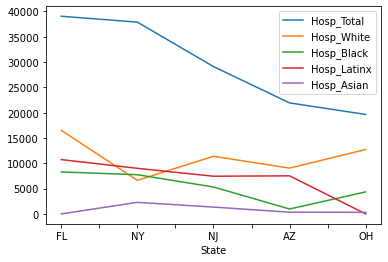

In [26]:
hosp_graph.plot();

From the above graph, we can conclude that hospitalization rates varies across races where the rates are the highest for White community along with Latin American community. According to the data, hospitalization rates were the lowest for Asian people. This data has inconsistency in it, but from the data gathered the above conclusions can be drawn.

Now, lets observe if there is a trend exists in hospitalizations across states.

In [36]:
hosp_states = hosp_data.groupby('State')['Hosp_Total'].mean().sort_values(ascending = False).head()
hosp_states

State
FL    39056.800000
NY    37892.631579
NJ    29111.915789
AZ    21934.347368
OH    19653.431579
Name: Hosp_Total, dtype: float64

From the above output, we can see that Florida have the highest hospitalization rates, and the hospitalization rates varies across states and territories in the United States. 

### Part 2: Has COVID-19 affected the black community differently than the white community?

This part of the final assignment will explore the dataset to access the differences in cases, hospitalizations, and deaths among black and white community across all the states and territories in the United States.

In [47]:
data_diff = data[['Date', 'State', 'Cases_Total', 'Cases_White', 'Cases_Black', 
               'Deaths_Total', 'Deaths_White', 'Deaths_Black', 
               'Hosp_Total', 'Hosp_White', 'Hosp_Black']][:56]
data_diff.head()

,Date,State,Cases_Total,Cases_White,Cases_Black,Deaths_Total,Deaths_White,Deaths_Black,Hosp_Total,Hosp_White,Hosp_Black
0,2021-03-07,AK,59332,18300,1499,305,127,9,1293,423,45
1,2021-03-07,AL,499819,160347,82790,10148,4730,2223,0,0,0
2,2021-03-07,AR,324818,207596,50842,5319,4171,784,0,0,0
3,2021-03-07,AS,0,0,0,0,0,0,0,0,0
4,2021-03-07,AZ,826454,308453,25775,16328,8066,433,57907,26710,2479


As the above DataFrame shows, we extracted the data for black and white community for cases, deaths, and hospitalizations in the United States for a certain amount of time.

Lets use groupby to see the number of cases in black and white community in different states and territories in the United States. 

In [48]:
white_cases = pd.DataFrame(data_diff.groupby('State')['Cases_White'].sum())
white_cases.sort_values('Cases_White', ascending = False).head()
black_cases = pd.DataFrame(data_diff.groupby('State')['Cases_Black'].sum())
black_cases.sort_values('Cases_Black', ascending = False).head()
new_df = pd.merge(white_cases, black_cases, left_index = True, right_index = True)
new_df.sort_values('Cases_White', ascending = False).head()

,Cases_White,Cases_Black
State,,
FL,664121,237772
OH,579544,101785
CA,546630,111279
TN,489782,102220
PA,487131,81180


In [49]:
new_df.sort_values('Cases_Black', ascending = False).head()

,Cases_White,Cases_Black
State,,
FL,664121,237772
GA,319208,216068
NC,442322,146993
LA,218332,136460
MD,134697,112033


From the above two dataframes, we can see that the amount of cases in the black and white community differ by states and the reason behind this is the population of the black community. Few states have a higher number of black population than other states. Lets graph the Cases for white and black community over time for Florida, California, and Georgia. 

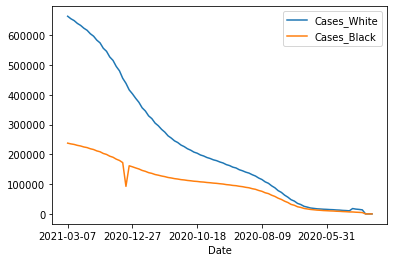

In [50]:
cases_plot = data.set_index(['State', 'Date'])
fl_white = pd.DataFrame(cases_plot.loc['FL']['Cases_White'])
fl_black = pd.DataFrame(cases_plot.loc['FL']['Cases_Black'])
ax = fl_white.plot()
fl_black.plot(ax = ax);

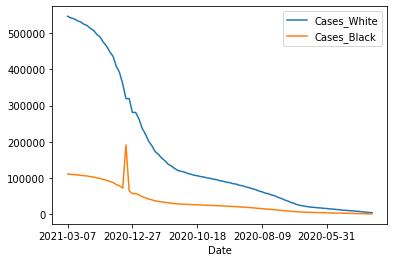

In [51]:
ca_white = pd.DataFrame(cases_plot.loc['CA']['Cases_White'])
ca_black = pd.DataFrame(cases_plot.loc['CA']['Cases_Black'])
ax = ca_white.plot()
ca_black.plot(ax = ax);

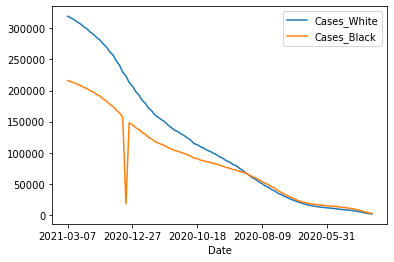

In [52]:
ga_white = pd.DataFrame(cases_plot.loc['GA']['Cases_White'])
ga_black = pd.DataFrame(cases_plot.loc['GA']['Cases_Black'])
ax = ga_white.plot()
ga_black.plot(ax = ax);

From the above three graphs, we can see that at the beginning of the COVID-19 pandemic, the black community was affected more than the white community in Florida, California, and Georigia. 

Now let's observe some trends in deaths for the white and black community across all the states and territories in the United States.

In [54]:
data_diff['Death_Percent_White'] = (data_diff['Deaths_White'] / data_diff['Deaths_Total']) * 100
data_diff['Death_Percent_Black'] = (data_diff['Deaths_Black'] / data_diff['Deaths_Total']) * 100
data_diff.head()

,Date,State,Cases_Total,Cases_White,Cases_Black,Deaths_Total,Deaths_White,Deaths_Black,Hosp_Total,Hosp_White,Hosp_Black,Death_Percent_White,Death_Percent_Black
0,2021-03-07,AK,59332,18300,1499,305,127,9,1293,423,45,41.639344,2.950820
1,2021-03-07,AL,499819,160347,82790,10148,4730,2223,0,0,0,46.610169,21.905794
2,2021-03-07,AR,324818,207596,50842,5319,4171,784,0,0,0,78.416996,14.739613
3,2021-03-07,AS,0,0,0,0,0,0,0,0,0,NaN,NaN
4,2021-03-07,AZ,826454,308453,25775,16328,8066,433,57907,26710,2479,49.399804,2.651886


Lets find states with higher percentages of deaths in the black community.

In [55]:
data_diff['State'][data_diff['Death_Percent_White'] < data_diff['Death_Percent_Black']]

8    DC
Name: State, dtype: object

From the above output, we can see that Washington DC is the only place where black community has seen more deaths than the white community.

Let's graph the death percentages for the states with the highest amount of death percentages in the white community and see the difference from the black community.

In [56]:
data_diff_graph = data_diff.set_index('State')
data_diff_plot = data_diff_graph.loc['NH']['Death_Percent_White']

The above part explored the comparison in deaths in the black and white community across all states and territories in the United States. Now, to answer the question completely, lets see trends in hospitalizations in the black and white community.

In [68]:
data_diff_hosp = data_diff.set_index(['State', 'Hosp_White', 'Hosp_Black'])
data_diff_hosp.sort_values('Hosp_Black', ascending = False)
data_diff_hosp.loc[['NY', 'GA', 'FL']]

,,,Date,Cases_Total,Cases_White,Cases_Black,Deaths_Total,Deaths_White,Deaths_Black,Hosp_Total,Death_Percent_White,Death_Percent_Black
State,Hosp_White,Hosp_Black,,,,,,,,,,
NY,21649,23650,2021-03-07,1681169,0,0,48591,17007,9812,89995,35.000309,20.193040
GA,24335,22046,2021-03-07,1023487,319208,216068,17906,8939,5282,56797,49.921814,29.498492
FL,38131,16138,2021-03-07,1944995,664121,237772,32266,17316,4812,82237,53.666398,14.913531


### Part 3: Is there a trend in COVID-19 testing across states and territories over a certain period of time?

For this part, we will explore if there are variations in testing across all the states and territories in the United States. We will also answer the question: Are the cases higher in states who have higher testing numbers?

In [15]:
test_data = data[['Date', 'State', 'Tests_Total', 'Cases_Total']][:56]
test_data.head()

,Date,State,Tests_Total,Cases_Total
0,2021-03-07,AK,0,59332
1,2021-03-07,AL,2323788,499819
2,2021-03-07,AR,2736442,324818
3,2021-03-07,AS,0,0
4,2021-03-07,AZ,7908105,826454


Above is the dataset that will be used for the rest of this question. Lets add a column called `Positivity_Rates`. This column can be calculated using the formula below:

\begin{equation}
PositivityRates = (CasesTotal / TestsTotal) * 100
\end{equation}

In [16]:
test_data['Positivity_Rates'] = (test_data['Cases_Total'] / test_data['Tests_Total']) * 100
test_data.head()

,Date,State,Tests_Total,Cases_Total,Positivity_Rates
0,2021-03-07,AK,0,59332,inf
1,2021-03-07,AL,2323788,499819,21.508804
2,2021-03-07,AR,2736442,324818,11.870085
3,2021-03-07,AS,0,0,NaN
4,2021-03-07,AZ,7908105,826454,10.450721


As we can observe in the above table that the positivity rates are calculated for a few states, but some positivity rates are inf and NaNs. This is because of uncertainity in data and the states or territories have not provided the data to the source and therefore these uncertainities in the data exist.

Lets extract the states or territories with the highest number of cases and tests and make assertions about if the cases are higher in places where more tests have taken place.

In [17]:
test_data.sort_values(by = ['Tests_Total'], ascending = False).head()

,Date,State,Tests_Total,Cases_Total,Positivity_Rates
5,2021-03-07,CA,49646014,3501394,7.052719
37,2021-03-07,NY,39695100,1681169,4.235205
10,2021-03-07,FL,22339182,1944995,8.706653
47,2021-03-07,TX,19907384,2686818,13.496590
16,2021-03-07,IL,18640190,1198335,6.428770


In [18]:
test_data.sort_values(by = ['Cases_Total'], ascending = False).head()

,Date,State,Tests_Total,Cases_Total,Positivity_Rates
5,2021-03-07,CA,49646014,3501394,7.052719
47,2021-03-07,TX,19907384,2686818,13.496590
10,2021-03-07,FL,22339182,1944995,8.706653
37,2021-03-07,NY,39695100,1681169,4.235205
16,2021-03-07,IL,18640190,1198335,6.428770


From the above two DataFrames we can see that California, New York, Florida, Texas, and Illinois have had the highest amount of COVID-19 tests across the states and we can also observe that Califronia, Texas, Florida, New York, and Illinois have a higher number of cases. So, we can conlude that higher the tests, the cases are relatively higher in those states as well. 

Now, let's sort the data based on the Positivity Rates.

In [19]:
test_data.sort_values(by = ['Positivity_Rates'], ascending = False).iloc[5:].head()

,Date,State,Tests_Total,Cases_Total,Positivity_Rates
15,2021-03-07,ID,645838,172931,26.776219
14,2021-03-07,IA,1326802,339671,25.600730
18,2021-03-07,KS,1270547,295861,23.286112
1,2021-03-07,AL,2323788,499819,21.508804
17,2021-03-07,IN,3150418,667262,21.180110


From the above DataFrame, we can see that higher tests and higher cases does not mean higher positivity rates. We can see that Idaho and Iowa are states with higher positivity rates even though they have lower Tests and Cases than other states such as California, Texas, and Florida.

Lets graph the positivity rates to see the trends in testing and cases for California, Texas, Florida, Idaho, and Iowa.

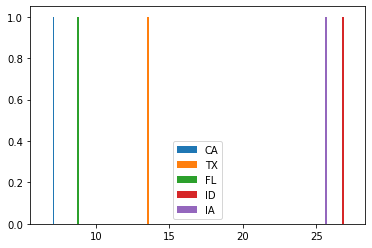

In [20]:
test_graph = test_data.set_index('State')
plt.hist(test_graph['Positivity_Rates'].loc['CA'])
plt.hist(test_graph['Positivity_Rates'].loc['TX'])
plt.hist(test_graph['Positivity_Rates'].loc['FL'])
plt.hist(test_graph['Positivity_Rates'].loc['ID'])
plt.hist(test_graph['Positivity_Rates'].loc['IA']);
plt.legend(['CA', 'TX', 'FL', 'ID', 'IA']);

Lets graph the Tests for California, Illinois, and Delaware. Delaware is the state with the least amount of tests. So to see the differences in tests is an important part in uderstanding the trends in testing across states and territories in the United States.

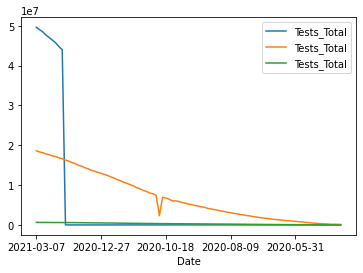

In [21]:
test_data_plot = data[['Date', 'State', 'Tests_Total', 'Cases_Total']]
test_plot = test_data_plot.set_index(['State', 'Date'])
test_ca = pd.DataFrame(test_plot.loc['CA']['Tests_Total'])
test_il = pd.DataFrame(test_plot.loc['IL']['Tests_Total'])
test_de = pd.DataFrame(test_plot.loc['DE']['Tests_Total'])
ax = test_ca.plot()
test_il.plot(ax = ax)
test_de.plot(ax = ax);

### Part 4: What states or territories were most affected by COVID-19 in terms of cases, deaths, and hospitalizations?

This part will explore all the parts of the dataset and will make conlusions based on the calculations made for cases, deaths, and hospitalizations for 55 U.S. states and territories.

#### Part 4(A): Cases across states and territories

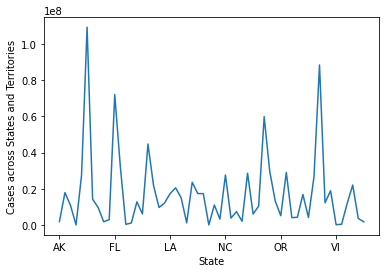

In [22]:
cases = data.groupby(by = ['State'])['Cases_Total'].sum()
cases.plot(ylabel = 'Cases across States and Territories');

The above plot depicts the total cases for all the states and territories across the United States.

In [23]:
cases.sort_values(ascending = False)[:3]

State
CA    109298533
TX     88458685
FL     72044096
Name: Cases_Total, dtype: int64

From the above output, we can see that California, Texas, and Florida are the three states with the highest cases across time. Let's observe the rise of cases in these states in a graph.

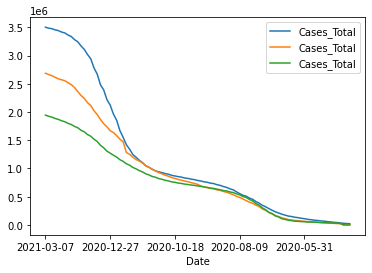

In [24]:
data_cases = data.set_index(['State', 'Date'])
data_ca = pd.DataFrame(data_cases.loc['CA']['Cases_Total'])
data_tx = pd.DataFrame(data_cases.loc['TX']['Cases_Total'])
data_fl = pd.DataFrame(data_cases.loc['FL']['Cases_Total'])
ax = data_ca.plot()
data_tx.plot(ax = ax)
data_fl.plot(ax = ax);

From the above plot, we can see that California has the highest number of cases across time from the 55 states and territories in the United States. 

#### Part 4(B): Death across states and territories

The deaths for each states are totaled in the Deaths_Total column in the dataset. The deaths are added to the count from the previus day when the data was recorded. So, the total number of deaths in the first 56 rows represent the total deaths across the entire time for each states and territories in the dataset.

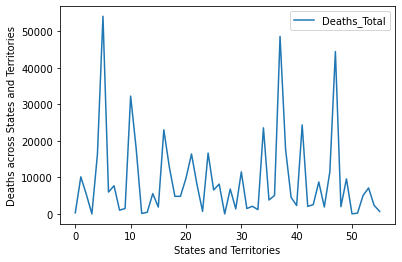

In [25]:
deaths = data[['State', 'Deaths_Total']][:56]
deaths.groupby(by = ['State'])['Deaths_Total'].sum()
deaths.plot(ylabel = 'Deaths across States and Territories', xlabel = 'States and Territories');

The above plot depicts the total deaths across all states and territories in the United States.

In [26]:
deaths_top = deaths.sort_values(by = ['Deaths_Total'], ascending = False).head()
deaths_top

,State,Deaths_Total
5,CA,54124
37,NY,48591
47,TX,44451
10,FL,32266
41,PA,24349


From the above DataFrame, we can see that California, New York, Texas, Florida, and Pennsylvania are the five states with the highest deaths across time in the United States. 

Let's plot the Total Deaths against States in a graph.

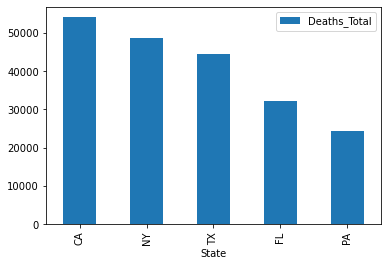

In [27]:
deaths_top.plot(kind = 'bar', x = 'State', y = 'Deaths_Total');

From the above plots and cells, we can see that Total deaths were highest in the above states across the United States. 

#### Part 4(C): Hospitalizations across states and territories

To visualize and interpret the data for total hospitalizations across all the states and territories in the United States, we will have to split the data based on the Hosp_Total column. The hospitalizations are added to the count from the previous date when the data was recorded. So, the total hospitalizations for all the states and territories resides in the first 56 rows of the Hosp_Total column.

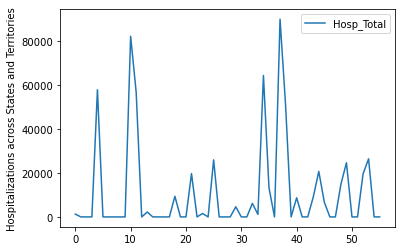

In [28]:
hosp = data[['State', 'Hosp_Total']][:56]
hosp.groupby(by = ['State'])['Hosp_Total'].sum()
hosp.plot(ylabel = 'Hospitalizations across States and Territories');

The above plot depicts the total hospitalizations across all states and territories in the United States.

In [29]:
hosp_top = hosp.sort_values(by = ['Hosp_Total'], ascending = False).head()
hosp_top

,State,Hosp_Total
37,NY,89995
10,FL,82237
34,NJ,64396
4,AZ,57907
11,GA,56797


Let's graph the total hospitalizations numbers for the above states and territories.

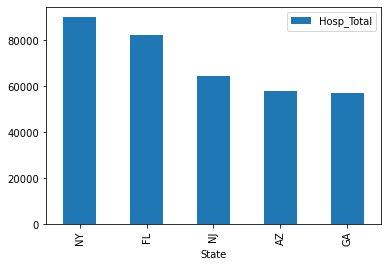

In [30]:
hosp_top.plot(kind = 'bar', x = 'State', y = 'Hosp_Total');

From the above plot, we can see that New York, Florida, New Jersey, Arizona, and Georgia have had the highest number of hospitalizations across the United States over the period of time the data was collected.

#### Conclusion for Part 4

From the above plots and graphs, we can see observe the following:

* Total hospitalizations are higher in New York and Florida, even though cases are higher in California and Texas. 
* Cases are higher in California, Texas, and Florida, and deaths are higher in California, New York, Texas, and Florida. We can conclude that states with higher COVID-19 positivity rates have a relatively high death rates.
* The state of California has the highest number of cases and deaths, and New York has the highest hospitalization rates across all the states and territories in the United States form April 12, 2020 to March 7, 2021.

### Conclusion